# Triangulations

A triangulation of a polygon is a subdivision into triangles. This has numerous applications, for example in computer graphics, visualization, numerical solution of PDEs, and interpolation.

First let us define a function to plot a triangulation. The function below is based on PyPlot, and it takes an array of points `p` and an array of triangle indices `t`.

In [1]:
using PyPlot
function tplot(p, t)
    # Plot triangular mesh with nodes `p` and triangles `t`
    tris = convert(Array{Int64}, hcat(t...)')
    tripcolor(first.(p), last.(p), tris .- 1, 0*tris[:,1],
              cmap="Set3", edgecolors="k", linewidth=1)
    axis("equal")
    return
end

tplot (generic function with 1 method)

We can test the function using a simple set of points and a triangulation:

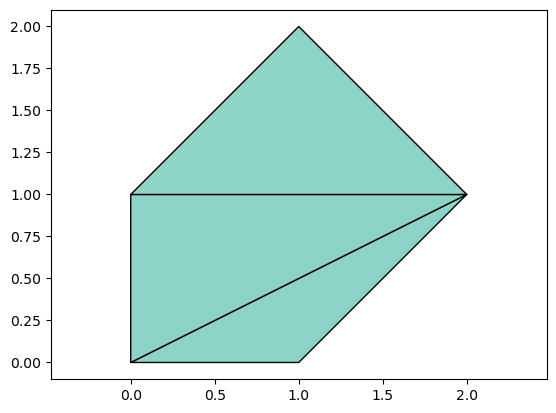

In [2]:
p = [[0,0], [1,0], [0,1], [1,2], [2,1]]
t = [[1,2,5], [1,5,3], [3,5,4]]
tplot(p,t)

#### Delaunay triangulation

A *Delaunay triangulation* for a given set of discrete points in a plane is a triangulation such that no point is inside the circumcircle of any triangle. It can be shown that Delaunay triangulations maximize the minimum angle of all the angles of the triangles in the triangulation, which makes them very useful e.g. in finite element methods for numerical solution of PDEs.

Many algorithms have been developed for computing a Delaunay triangulation from a set of points, and here we will use an implementation from the Delaunator package:

In [3]:
using Delaunator

# Delaunay triangulation `t` of array of nodes `p`
delaunay(p) = collect.(triangulate(p).triangles)

delaunay (generic function with 1 method)

First, let us compute and plot the Deluanay triangulation of the same points as before:

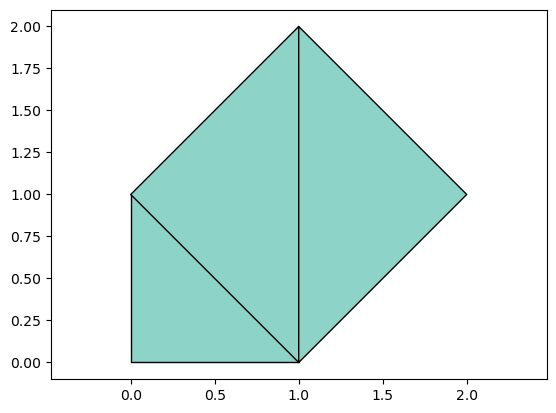

In [4]:
t = delaunay(p)
tplot(p,t)

Note that this triangulation is different than our previous one - it satisfies the properties mentioned above.

Next let us compute and plot the delaunay triangulation of a random set of points:

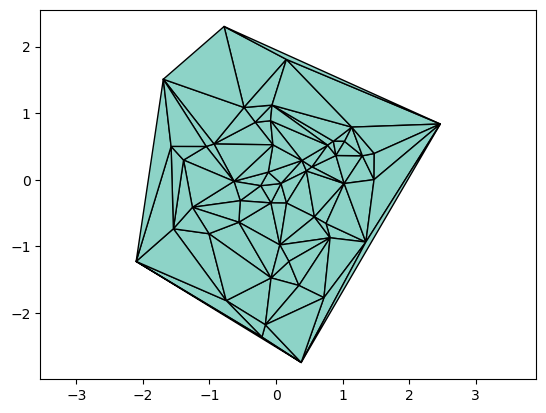

In [5]:
p = [ randn(2) for i = 1:50 ]
t = delaunay(p)
tplot(p,t)